In [2]:
import sys
import torch as tc
import matplotlib.pyplot as plt

sys.path.append("../")
from src.util import *
from src.greeks import *
from src.bsm import *

## Example 15.6

page 356, call price is 4.76, put price is 0.81

In [3]:
print(calculate_bsm_option_price(tc.tensor([0.2, 42, 40, 0.1, 0.5]), option_type = "call"))
print(calculate_bsm_option_price(tc.tensor([0.2, 42, 40, 0.1, 0.5]), option_type = "put"))

tensor(4.7594)
tensor(0.8086)


# N(d1) and N(d2)

N(d1) and N(d2) are numerically similar.

The larger the volatility, the larger the differences between them

Text(0.5, 1.0, 'Sigma = 0.5')

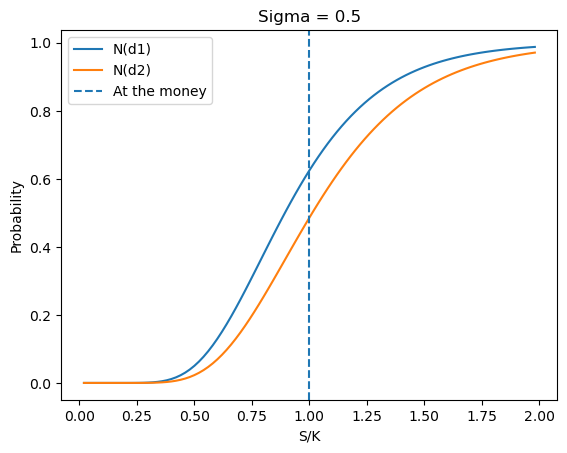

In [4]:
Nd1s = [N(cal_d1(tc.tensor([0.5, s0, 50, 0.1, 0.5]))) for s0 in tc.arange(1, 100)]
Nd2s = [N(cal_d2(tc.tensor([0.5, s0, 50, 0.1, 0.5]))) for s0 in tc.arange(1, 100)]
plt.plot(tc.arange(1, 100)/50, Nd1s, label = "N(d1)")
plt.plot(tc.arange(1, 100)/50, Nd2s, label = "N(d2)")
plt.xlabel("S/K")
plt.ylabel("Probability")
plt.axvline(x = 1, label = "At the money", linestyle = "dashed")
plt.legend()
plt.title("Sigma = 0.5")

Text(0.5, 1.0, 'Sigma = 0.1')

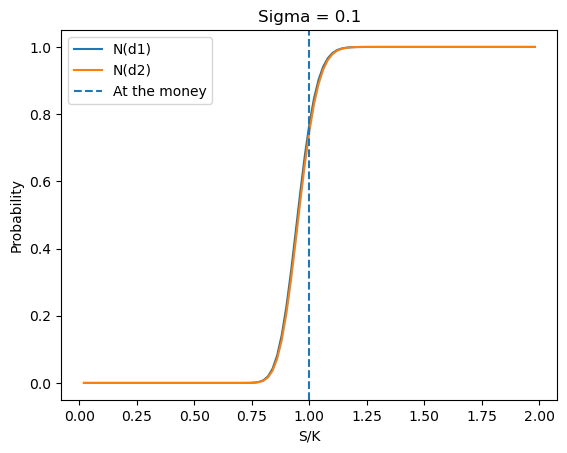

In [5]:
Nd1s = [N(cal_d1(tc.tensor([0.1, s0, 50, 0.1, 0.5]))) for s0 in tc.arange(1, 100)]
Nd2s = [N(cal_d2(tc.tensor([0.1, s0, 50, 0.1, 0.5]))) for s0 in tc.arange(1, 100)]
plt.plot(tc.arange(1, 100)/50, Nd1s, label = "N(d1)")
plt.plot(tc.arange(1, 100)/50, Nd2s, label = "N(d2)")
plt.xlabel("S/K")
plt.ylabel("Probability")
plt.axvline(x = 1, label = "At the money", linestyle = "dashed")
plt.legend()
plt.title("Sigma = 0.1")

## Price change wrt volatility

### Call

In [6]:
call_sigma = [calculate_bsm_option_price(tc.tensor([sig, 42, 40, 0.1, 0.5]), option_type = "call") for sig in tc.arange(0, 1, 0.01)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


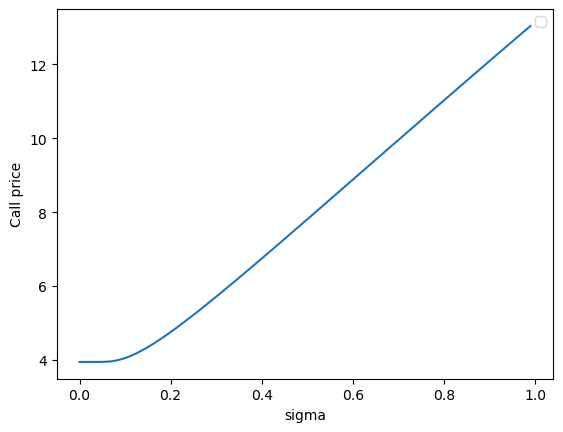

In [7]:
plt.plot(tc.arange(0, 1, 0.01), call_sigma)
plt.xlabel("sigma")
plt.ylabel("Call price")
plt.legend()

In [8]:
S_range = tc.arange(0, 100, 20)
sigma_range = tc.arange(0, 1, 0.01)
call_sigma = [[calculate_bsm_option_price(tc.tensor([sig, S, 40, 0.1, 0.5]), option_type = "call") for sig in sigma_range] for S in S_range]

Text(0.5, 1.0, 'Call price vs Volatility')

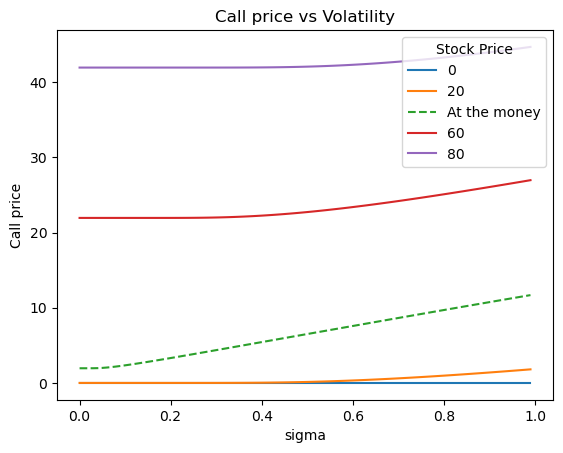

In [9]:
for i in range(len(S_range)):
    if (S_range[i] == tc.tensor(40)):
        plt.plot(sigma_range, call_sigma[i], label = "At the money", linestyle = "dashed")
    else:
        plt.plot(sigma_range, call_sigma[i], label = int(S_range[i]))

plt.legend(title = "Stock Price")
plt.xlabel("sigma")
plt.ylabel("Call price")
plt.title("Call price vs Volatility")

## Put

In [10]:
put_sigma = [[calculate_bsm_option_price(tc.tensor([sig, S, 40, 0.1, 0.5]), option_type = "put") for sig in sigma_range] for S in S_range]

Text(0.5, 1.0, 'Put price vs Volatility')

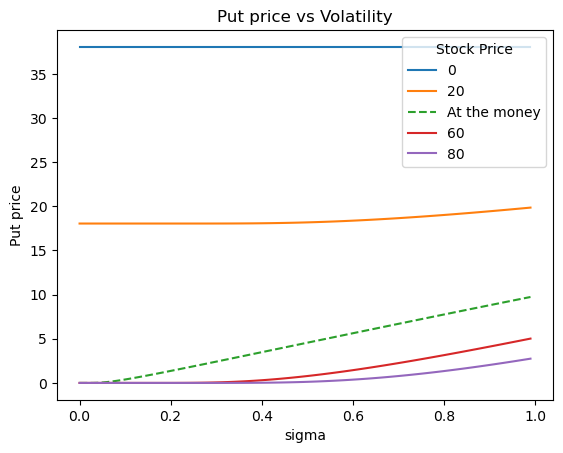

In [11]:
for i in range(len(S_range)):
    if (S_range[i] == tc.tensor(40)):
        plt.plot(sigma_range, put_sigma[i], label = "At the money", linestyle = "dashed")
    else:
        plt.plot(sigma_range, put_sigma[i], label = int(S_range[i]))
    

plt.legend(title = "Stock Price")
plt.xlabel("sigma")
plt.ylabel("Put price")
plt.title("Put price vs Volatility")

## Price change wrt risk-free-rate

In [12]:
r_range = tc.arange(0, 1, 0.01)
call_r = [[calculate_bsm_option_price(tc.tensor([0.2, S, 40, r, 0.5]), option_type = "call") for r in r_range] for S in S_range]

Text(0.5, 1.0, 'Call price vs r')

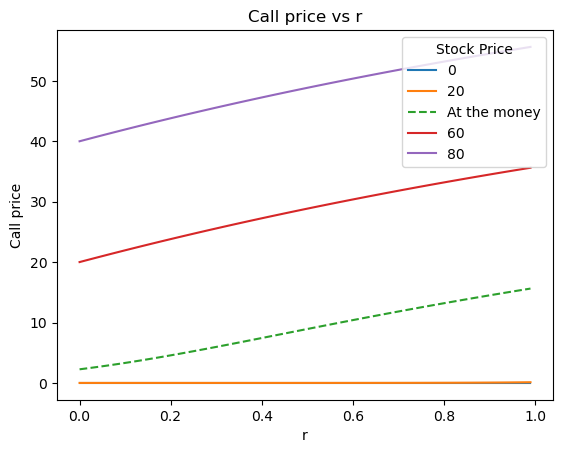

In [13]:
for i in range(len(S_range)):
    if (S_range[i] == tc.tensor(40)):
        plt.plot(sigma_range, call_r[i], label = "At the money", linestyle = "dashed")
    else:
        plt.plot(sigma_range, call_r[i], label = int(S_range[i]))
    

plt.legend(title = "Stock Price")
plt.xlabel("r")
plt.ylabel("Call price")
plt.title("Call price vs r")

Strike price is 40, so the call prices is 0 for any S < 40

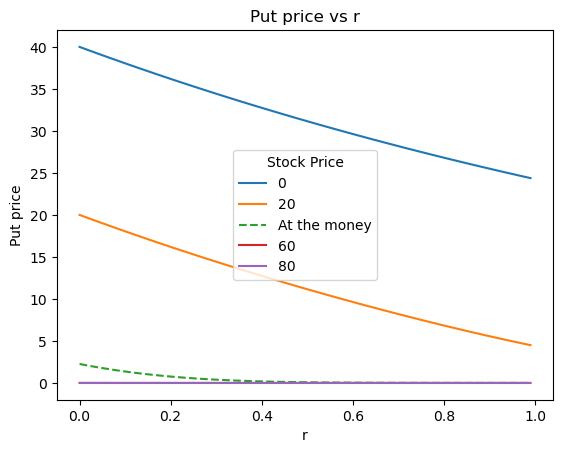

In [14]:
put_r = [[calculate_bsm_option_price(tc.tensor([0.2, S, 40, r, 0.5]), option_type = "put") for r in r_range] for S in S_range]
for i in range(len(S_range)):
    if (S_range[i] == tc.tensor(40)):
        plt.plot(sigma_range, put_r[i], label = "At the money", linestyle = "dashed")
    else:
        plt.plot(sigma_range, put_r[i], label = int(S_range[i]))
    


plt.xlabel("r")
plt.ylabel("Put price")
plt.title("Put price vs r")
plt.legend(title = "Stock Price")

Similarly, for any S > 80, where K = 40, the put option worth nothing

# Payoff

In [15]:
payoff_stock = [calculate_bsm_option_price(tc.tensor([0.2, S, 40, 0.1, 0.5]), option_type = "call") for S in tc.arange(0, 100, 1)]

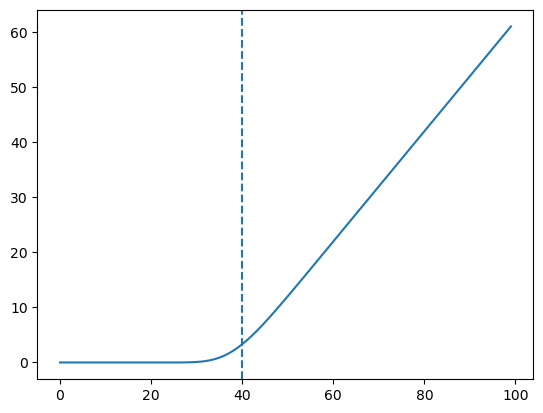

In [18]:
plt.plot(payoff_stock)
plt.axvline(x = 40, linestyle = "dashed")